In [1]:
import pandas as pd
import numpy as np
import csv 
import matplotlib.pyplot as plt
import random
import configparser
from random import randrange
%matplotlib inline
import os

In [3]:
print('loading the config file')
config = configparser.ConfigParser()
config_fileName = ('config.ini')
config.read(config_fileName)
datafolder_ge =config['DATASET']['DATA_FOLDER_GE']
bat_no =config['SETTING']['BATTARY_NO']
bat_no = int(bat_no.strip('bat'))
battery_df =[]

for bt in range(bat_no):
    path = datafolder_ge +os.sep+'final-bat' + str(bt+1) + '.csv'
    print('\n***********************************************************************************************************')
    print('\n***********************************************************************************************************')
    print('*************************** Print Info and Head of dataframe of battery type {}****************************'.format(str(bt+1)))
    print('Loading data from ' +path)
    battery_df.append( pd.read_csv(path))
    print(battery_df[bt].info())
    print(battery_df[bt].head())
    print ('Max cycles: ',battery_df[bt].Battery_Cycle_No.max())



loading the config file

***********************************************************************************************************

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 1****************************
Loading data from data_ge\final-bat1.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8627791 entries, 0 to 8627790
Data columns (total 11 columns):
Battery_Cycle_No    int64
Location            object
Battery_Status      int64
Battery_Level       int64
Battery_Type        object
u_id                int64
DateTime            object
full_name           object
Latitude            float64
Langitude           float64
User_Type           int64
dtypes: float64(2), int64(5), object(4)
memory usage: 724.1+ MB
None
   Battery_Cycle_No Location  Battery_Status  Battery_Level Battery_Type  \
0                 1      SFU               2             5

Now we will check the battery 1 behaviour

In [4]:
input_df = battery_df[0]
input_df.head()

,Battery_Cycle_No,Location,Battery_Status,Battery_Level,Battery_Type,u_id,DateTime,full_name,Latitude,Langitude,User_Type
0,1,SFU,2,55,bat1,1507,01-01-2018 03:00:00,user001507,49.275361,-122.912560,1
1,1,SFU,2,17,bat1,1509,01-01-2018 03:00:00,user001509,49.275361,-122.912560,3
2,1,SFU,2,44,bat1,1510,01-01-2018 03:00:00,user001510,49.275361,-122.912560,1
3,1,CDOT,2,29,bat1,1512,01-01-2018 03:00:00,user001512,41.903507,-87.667165,3
4,1,CDOT,2,52,bat1,1519,01-01-2018 03:00:00,user001519,41.903507,-87.667165,2


In [5]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8627791 entries, 0 to 8627790
Data columns (total 11 columns):
Battery_Cycle_No    int64
Location            object
Battery_Status      int64
Battery_Level       int64
Battery_Type        object
u_id                int64
DateTime            object
full_name           object
Latitude            float64
Langitude           float64
User_Type           int64
dtypes: float64(2), int64(5), object(4)
memory usage: 724.1+ MB


## Cleaning Data:
* remove the prefix bat from battery type
* reformat datetime
* Convert categorical Battery Status to numerical 

In [6]:
input_df['Battery_Type']= input_df['Battery_Type'].apply(lambda x: x.strip('bat'))
input_df["DateTime"] = pd.to_datetime(input_df["DateTime"],format='%m-%d-%Y %H:%M:%S', errors='ignore')
input_df.head()

,Battery_Cycle_No,Location,Battery_Status,Battery_Level,Battery_Type,u_id,DateTime,full_name,Latitude,Langitude,User_Type
0,1,SFU,2,55,1,1507,2018-01-01 03:00:00,user001507,49.275361,-122.912560,1
1,1,SFU,2,17,1,1509,2018-01-01 03:00:00,user001509,49.275361,-122.912560,3
2,1,SFU,2,44,1,1510,2018-01-01 03:00:00,user001510,49.275361,-122.912560,1
3,1,CDOT,2,29,1,1512,2018-01-01 03:00:00,user001512,41.903507,-87.667165,3
4,1,CDOT,2,52,1,1519,2018-01-01 03:00:00,user001519,41.903507,-87.667165,2


In [7]:
bat1_df = pd.get_dummies(input_df, columns=['Battery_Status'])
bat1_df.head()

,Battery_Cycle_No,Location,Battery_Level,Battery_Type,u_id,DateTime,full_name,Latitude,Langitude,User_Type,Battery_Status_1,Battery_Status_2
0,1,SFU,55,1,1507,2018-01-01 03:00:00,user001507,49.275361,-122.912560,1,0,1
1,1,SFU,17,1,1509,2018-01-01 03:00:00,user001509,49.275361,-122.912560,3,0,1
2,1,SFU,44,1,1510,2018-01-01 03:00:00,user001510,49.275361,-122.912560,1,0,1
3,1,CDOT,29,1,1512,2018-01-01 03:00:00,user001512,41.903507,-87.667165,3,0,1
4,1,CDOT,52,1,1519,2018-01-01 03:00:00,user001519,41.903507,-87.667165,2,0,1


## Preparing data for labeling: 
* removing the not related columns
* converting Datetime to only date to do aggregation over the date


In [8]:
cleaned_df = bat1_df.drop(columns=['Location','Latitude','Langitude','full_name','Battery_Level','Battery_Type' \
                    ,'Battery_Cycle_No']) 
cleaned_df.head()

,u_id,DateTime,User_Type,Battery_Status_1,Battery_Status_2
0,1507,2018-01-01 03:00:00,1,0,1
1,1509,2018-01-01 03:00:00,3,0,1
2,1510,2018-01-01 03:00:00,1,0,1
3,1512,2018-01-01 03:00:00,3,0,1
4,1519,2018-01-01 03:00:00,2,0,1


In [9]:
# adding a new column for Date and dropping datetime to do the aggregation over the weeks
cleaned_df["Date"] = pd.to_datetime(cleaned_df["DateTime"]).dt.normalize()
cleaned_df = cleaned_df.drop(columns='DateTime')

In [10]:
cleaned_df.head()

,u_id,User_Type,Battery_Status_1,Battery_Status_2,Date
0,1507,1,0,1,2018-01-01
1,1509,3,0,1,2018-01-01
2,1510,1,0,1,2018-01-01
3,1512,3,0,1,2018-01-01
4,1519,2,0,1,2018-01-01


In [11]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8627791 entries, 0 to 8627790
Data columns (total 5 columns):
u_id                int64
User_Type           int64
Battery_Status_1    uint8
Battery_Status_2    uint8
Date                datetime64[ns]
dtypes: datetime64[ns](1), int64(2), uint8(2)
memory usage: 213.9 MB


Aggregating the charginf and discharging status of batteries in each week 

In [12]:
eee = cleaned_df.groupby(['u_id','User_Type']).resample('W-Mon', on='Date').sum().drop(columns=['u_id','User_Type']).reset_index()

In [13]:
eee['week'] = eee['Date'].dt.week

In [14]:
eee.head()

,u_id,User_Type,Date,Battery_Status_1,Battery_Status_2,week
0,1507,1,2018-01-01,0,21,1
1,1507,1,2018-01-08,6,162,2
2,1507,1,2018-01-15,6,162,3
3,1507,1,2018-01-22,7,161,4
4,1507,1,2018-01-29,6,162,5


In [15]:
eee.week.max()

52

Adding a new column to calculate the fraction of charging and discharging in each week

In [16]:
eee['frac_charge'] = eee['Battery_Status_1']/(eee['Battery_Status_2']+eee['Battery_Status_1'])


In [17]:
eee['frac_discharge'] = eee['Battery_Status_2']/(eee['Battery_Status_2']+eee['Battery_Status_1'])

In [18]:
eee.head()

,u_id,User_Type,Date,Battery_Status_1,Battery_Status_2,week,frac_charge,frac_discharge
0,1507,1,2018-01-01,0,21,1,0.000000,1.000000
1,1507,1,2018-01-08,6,162,2,0.035714,0.964286
2,1507,1,2018-01-15,6,162,3,0.035714,0.964286
3,1507,1,2018-01-22,7,161,4,0.041667,0.958333
4,1507,1,2018-01-29,6,162,5,0.035714,0.964286


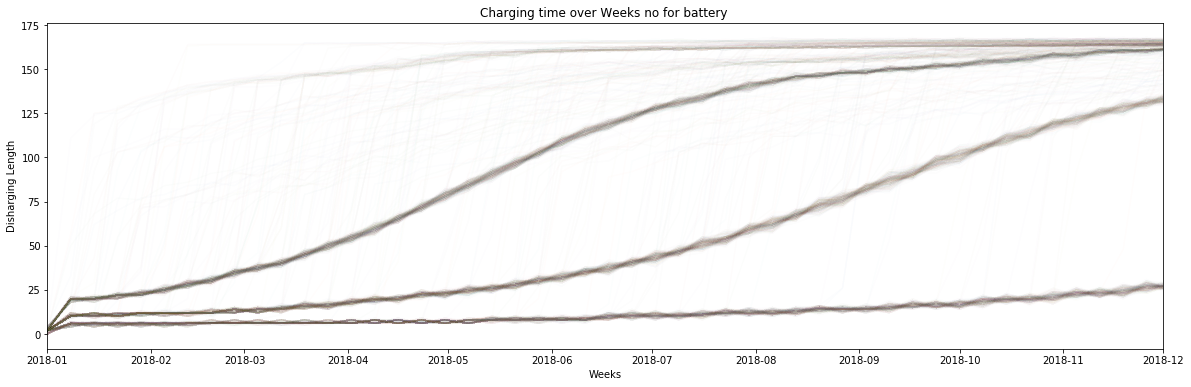

In [19]:
plt.figure(figsize=(20,6))
for u in eee['u_id'].unique():
    user_tt = eee[ eee['u_id'] == u]
    plt.plot(user_tt['Date'], user_tt['Battery_Status_1'],alpha=0.01)
plt.xlabel('Weeks')
plt.ylabel('Disharging Length')
plt.title('Charging time over Weeks no for battery ')
plt.xlim('2018-01','2018-12')
plt.show()

### As it is visible in above plot, the charging time increased over the time on three different trends

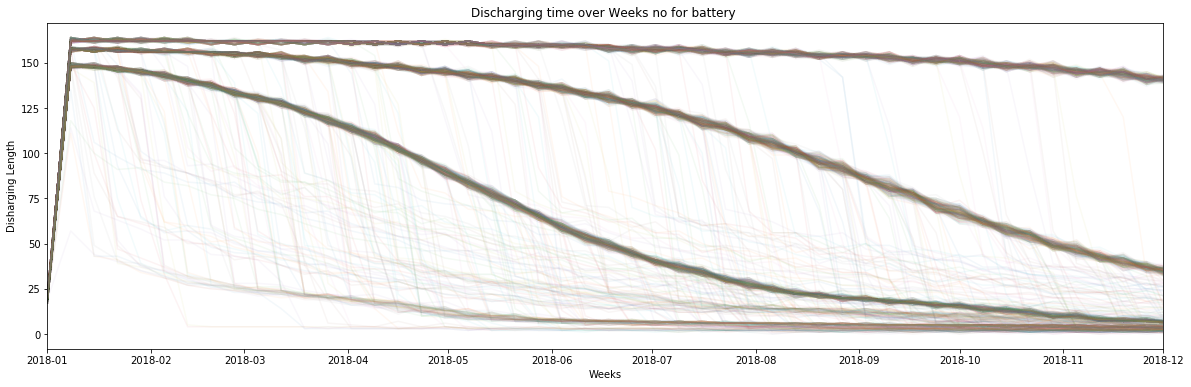

In [20]:
plt.figure(figsize=(20,6))
for u in eee['u_id'].unique():
    user_tt = eee[ eee['u_id'] == u]
    plt.plot(user_tt['Date'], user_tt['Battery_Status_2'], alpha=0.05)
plt.xlabel('Weeks')
plt.ylabel('Disharging Length')
plt.title('Discharging time over Weeks no for battery ')
plt.xlim('2018-01','2018-12')

plt.show()

### As it is visible in above plot, the discharging time decreased over the time on three different trends

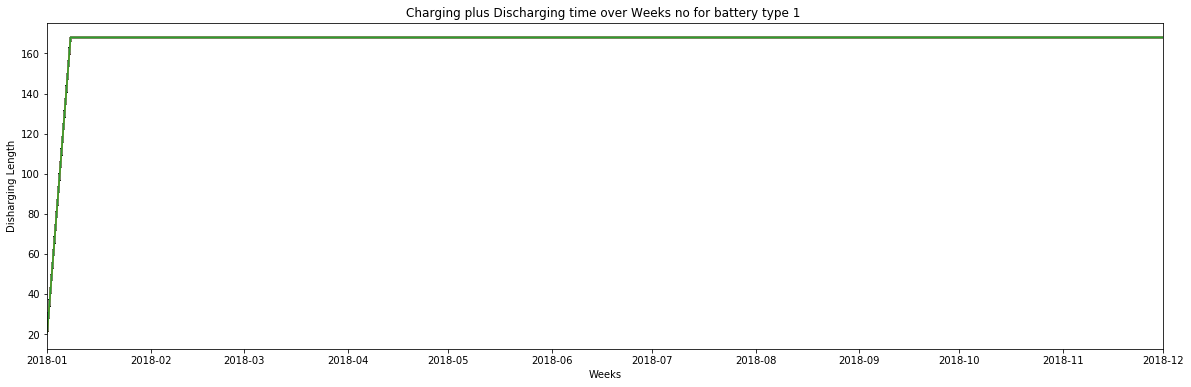

In [21]:
plt.figure(figsize=(20,6))
for u in eee['u_id'].unique():
    user_tt = eee[ eee['u_id'] == u]
    plt.plot(user_tt['Date'], user_tt['Battery_Status_2'] + user_tt['Battery_Status_1'], alpha=1)
plt.xlabel('Weeks')
plt.ylabel('Disharging Length')
plt.title('Charging plus Discharging time over Weeks no for battery type 1 ')
plt.xlim('2018-01','2018-12')

plt.show()

### As it is visible in above plot, the cycle length (charging + dischargeing time) is constant

### Now let's chaeck the user behaviour of three types.
I extract the u_id of different user_type manualy form the datasets. If you run  the data generation code you should do the same to see same trend in data 

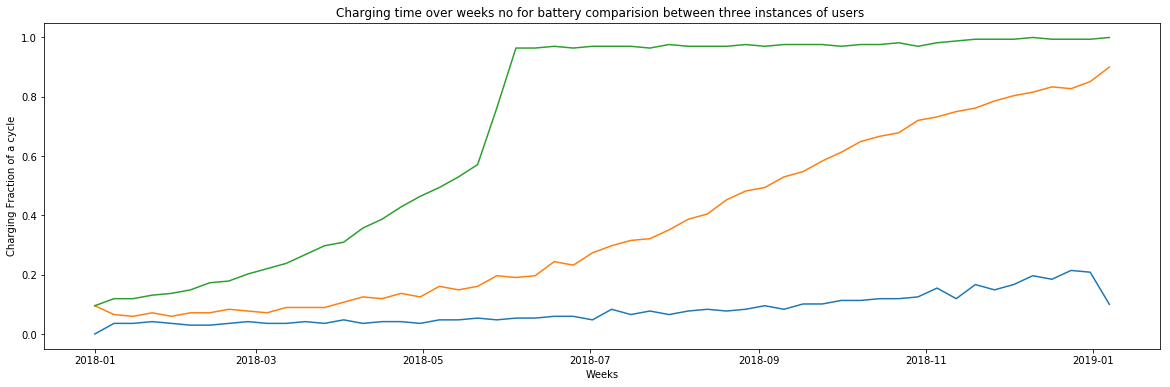

In [22]:
plt.figure(figsize=(20,6))
# for u in eee['u_id'].unique():
user_tt = eee[ eee['u_id'] == 1507]
# plt.plot(user_tt['DateTime'], user_tt['Battery_Status_1'])
plt.plot(user_tt['Date'], user_tt['frac_charge'])

user_tt = eee[ eee['u_id'] == 1520]
# plt.plot(user_tt['DateTime'], user_tt['Battery_Status_1'])
plt.plot(user_tt['Date'], user_tt['frac_charge'])

user_tt = eee[ eee['u_id'] == 1509]
# plt.plot(user_tt['DateTime'], user_tt['Battery_Status_1'])
plt.plot(user_tt['Date'], user_tt['frac_charge'])

plt.xlabel('Weeks')
plt.ylabel('Charging Fraction of a cycle')
plt.title('Charging time over weeks no for battery comparision between three instances of users ')
plt.show()

# Now Start Labeliing the cleaned data od dataset of battery type 1
* I categorised them based on teh fraction of the dischcarging rate over the time for each record.
* 0 to 0.3 considered as week
* 0.3 to 0.6 considered as medium
* 0.6 to 1 as healthy

In [23]:
bins = [0.0, 0.30, 0.60, 1.0]
labels = [1,2,3]

In [24]:
eee['health_status'] = pd.cut(eee['frac_discharge'],  bins=bins, labels=labels)
eee.head()

,u_id,User_Type,Date,Battery_Status_1,Battery_Status_2,week,frac_charge,frac_discharge,health_status
0,1507,1,2018-01-01,0,21,1,0.000000,1.000000,3
1,1507,1,2018-01-08,6,162,2,0.035714,0.964286,3
2,1507,1,2018-01-15,6,162,3,0.035714,0.964286,3
3,1507,1,2018-01-22,7,161,4,0.041667,0.958333,3
4,1507,1,2018-01-29,6,162,5,0.035714,0.964286,3


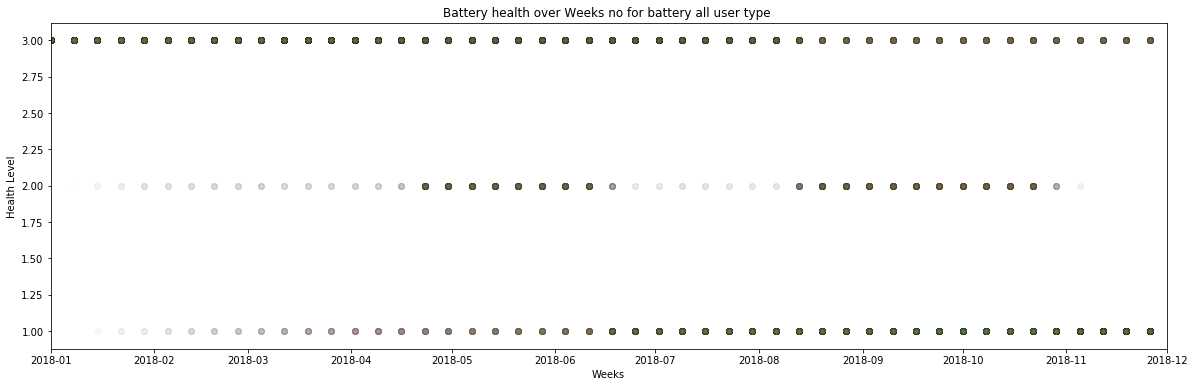

In [25]:
plt.figure(figsize=(20,6))
for u in eee['u_id'].unique():
    user_tt = eee[ eee['u_id'] == u]
    plt.scatter(user_tt['Date'], user_tt['health_status'] , alpha=0.01)
plt.xlabel('Weeks')
plt.ylabel('Health Level')
plt.title('Battery health over Weeks no for battery all user type ')
plt.xlim('2018-01','2018-12')
plt.show()

In [26]:
eee.head()

,u_id,User_Type,Date,Battery_Status_1,Battery_Status_2,week,frac_charge,frac_discharge,health_status
0,1507,1,2018-01-01,0,21,1,0.000000,1.000000,3
1,1507,1,2018-01-08,6,162,2,0.035714,0.964286,3
2,1507,1,2018-01-15,6,162,3,0.035714,0.964286,3
3,1507,1,2018-01-22,7,161,4,0.041667,0.958333,3
4,1507,1,2018-01-29,6,162,5,0.035714,0.964286,3


### let's save this data in the data generation folder

In [27]:
eee.to_csv(datafolder_ge +os.sep+'battery1_labeled_v2.csv',index=False)

### Now let's do sama process on final-bat2.csv  and create new dataset with battery health data

In [28]:

input_df2 = battery_df[1]
input_df2['Battery_Type']= input_df2['Battery_Type'].apply(lambda x: x.strip('bat'))
input_df2["DateTime"] = pd.to_datetime(input_df2["DateTime"],format='%m-%d-%Y %H:%M:%S', errors='ignore')
bat2_df = pd.get_dummies(input_df2, columns=['Battery_Status'])
cleaned_df2 = bat2_df.drop(columns=['Location','Latitude','Langitude','full_name','Battery_Level','Battery_Type','Battery_Cycle_No']) 
cleaned_df2.head()
cleaned_df2["Date"] = pd.to_datetime(cleaned_df2["DateTime"]).dt.normalize()
cleaned_df2 = cleaned_df2.drop(columns='DateTime')
eee2 = cleaned_df2.groupby(['u_id','User_Type']).resample('W-Mon', on='Date').sum().drop(columns=['u_id','User_Type']).reset_index()
eee2['week'] = eee2['Date'].dt.week
eee2['frac_charge'] = eee2['Battery_Status_1']/(eee2['Battery_Status_2']+eee2['Battery_Status_1'])
eee2['frac_discharge'] = eee2['Battery_Status_2']/(eee2['Battery_Status_2']+eee2['Battery_Status_1'])
bins = [0.0, 0.30, 0.60, 1.0]
labels = [1,2,3]
eee2['health_status'] = pd.cut(eee2['frac_discharge'],  bins=bins, labels=labels)
eee2.to_csv(datafolder_ge +os.sep+'battery2_labeled_v2.csv',index=False)

In [29]:
eee2.head()

,u_id,User_Type,Date,Battery_Status_1,Battery_Status_2,week,frac_charge,frac_discharge,health_status
0,1502,1,2018-01-01,1,20,1,0.047619,0.952381,3
1,1502,1,2018-01-08,1,167,2,0.005952,0.994048,3
2,1502,1,2018-01-15,2,166,3,0.011905,0.988095,3
3,1502,1,2018-01-22,1,167,4,0.005952,0.994048,3
4,1502,1,2018-01-29,2,166,5,0.011905,0.988095,3


### Now let's do sama process on final-bat2.csv  and create new dataset with battery health data

In [30]:
input_df3 = battery_df[2]
input_df3['Battery_Type']= input_df3['Battery_Type'].apply(lambda x: x.strip('bat'))
input_df3["DateTime"] = pd.to_datetime(input_df3["DateTime"],format='%m-%d-%Y %H:%M:%S', errors='ignore')
bat3_df = pd.get_dummies(input_df3, columns=['Battery_Status'])
cleaned_df3 = bat3_df.drop(columns=['Location','Latitude','Langitude','full_name','Battery_Level','Battery_Type','Battery_Cycle_No']) 
cleaned_df3.head()
cleaned_df3["Date"] = pd.to_datetime(cleaned_df3["DateTime"]).dt.normalize()
cleaned_df3 = cleaned_df3.drop(columns='DateTime')
eee3 = cleaned_df3.groupby(['u_id','User_Type']).resample('W-Mon', on='Date').sum().drop(columns=['u_id','User_Type']).reset_index()
eee3['week'] = eee3['Date'].dt.week
eee3['frac_charge'] = eee3['Battery_Status_1']/(eee3['Battery_Status_2']+eee3['Battery_Status_1'])
eee3['frac_discharge'] = eee3['Battery_Status_2']/(eee3['Battery_Status_2']+eee3['Battery_Status_1'])
bins = [0.0, 0.30, 0.60, 1.0]
labels = [1,2,3]
eee3['health_status'] = pd.cut(eee3['frac_discharge'],  bins=bins, labels=labels)
eee3.to_csv(datafolder_ge +os.sep+'battery3_labeled_v2.csv',index=False)

In [31]:
eee3.head()

,u_id,User_Type,Date,Battery_Status_1,Battery_Status_2,week,frac_charge,frac_discharge,health_status
0,1501,2,2018-01-01,2,19,1,0.095238,0.904762,3
1,1501,2,2018-01-08,8,160,2,0.047619,0.952381,3
2,1501,2,2018-01-15,9,159,3,0.053571,0.946429,3
3,1501,2,2018-01-22,8,160,4,0.047619,0.952381,3
4,1501,2,2018-01-29,10,158,5,0.059524,0.940476,3


### Let's check some user behaviour
* first concate all cleaned data of three battery datasets

In [32]:
frames = [cleaned_df , cleaned_df2 , cleaned_df3]
all_data_df = pd.concat(frames)
cleaned_df = all_data_df

In [33]:
cleaned_df.head()

,u_id,User_Type,Battery_Status_1,Battery_Status_2,Date
0,1507,1,0,1,2018-01-01
1,1509,3,0,1,2018-01-01
2,1510,1,0,1,2018-01-01
3,1512,3,0,1,2018-01-01
4,1519,2,0,1,2018-01-01


In this section to study the behaviour of different user types  we split the to 3 dataframe based on the usertype column

In [34]:
user_type1 = cleaned_df[cleaned_df['User_Type']==1].drop(columns='User_Type')
user_type2 = cleaned_df[cleaned_df['User_Type']==2].drop(columns='User_Type')
user_type3 = cleaned_df[cleaned_df['User_Type']==3].drop(columns='User_Type')
user_type2.head()

,u_id,Battery_Status_1,Battery_Status_2,Date
4,1519,0,1,2018-01-01
5,1520,0,1,2018-01-01
8,1525,0,1,2018-01-01
13,1533,0,1,2018-01-01
16,1543,0,1,2018-01-01


In [35]:
user_type1 = user_type1.groupby(['u_id']).resample('W-Mon', on='Date').sum()
user_type2 = user_type2.groupby(['u_id']).resample('W-Mon', on='Date').sum()
user_type3 = user_type3.groupby(['u_id']).resample('W-Mon', on='Date').sum()

In [36]:
user_type2.head()

u_id  Battery_Status_1  Battery_Status_2
u_id Date                                                  
1501 2018-01-01   31521                 2                19
     2018-01-08  252168                 8               160
     2018-01-15  252168                 9               159
     2018-01-22  252168                 8               160
     2018-01-29  252168                10               158

In [37]:
user_type1 = user_type1.drop(columns=['u_id']).reset_index()
user_type2 = user_type2.drop(columns=['u_id']).reset_index()
user_type3 = user_type3.drop(columns=['u_id']).reset_index()
user_type2.head()

,u_id,Date,Battery_Status_1,Battery_Status_2
0,1501,2018-01-01,2,19
1,1501,2018-01-08,8,160
2,1501,2018-01-15,9,159
3,1501,2018-01-22,8,160
4,1501,2018-01-29,10,158


In [40]:
user_type1.head()

,u_id,Date,Battery_Status_1,Battery_Status_2
0,1502,2018-01-01,1,20
1,1502,2018-01-08,1,167
2,1502,2018-01-15,2,166
3,1502,2018-01-22,1,167
4,1502,2018-01-29,2,166


In [39]:
user_type3.head()

,u_id,Date,Battery_Status_1,Battery_Status_2
0,1509,2018-01-01,2,19
1,1509,2018-01-08,20,148
2,1509,2018-01-15,20,148
3,1509,2018-01-22,22,146
4,1509,2018-01-29,23,145


In [41]:
user_type1['frac_charge'] = user_type1['Battery_Status_1']/(user_type1['Battery_Status_2']+user_type1['Battery_Status_1'])
user_type2['frac_charge'] = user_type2['Battery_Status_1']/(user_type2['Battery_Status_2']+user_type2['Battery_Status_1'])
user_type3['frac_charge'] = user_type3['Battery_Status_1']/(user_type3['Battery_Status_2']+user_type3['Battery_Status_1'])


user_type1['frac_discharge'] = user_type1['Battery_Status_2']/(user_type1['Battery_Status_2']+user_type1['Battery_Status_1'])
user_type2['frac_discharge'] = user_type2['Battery_Status_2']/(user_type2['Battery_Status_2']+user_type2['Battery_Status_1'])
user_type3['frac_discharge'] = user_type3['Battery_Status_2']/(user_type3['Battery_Status_2']+user_type3['Battery_Status_1'])

user_type1.head()

,u_id,Date,Battery_Status_1,Battery_Status_2,frac_charge,frac_discharge
0,1502,2018-01-01,1,20,0.047619,0.952381
1,1502,2018-01-08,1,167,0.005952,0.994048
2,1502,2018-01-15,2,166,0.011905,0.988095
3,1502,2018-01-22,1,167,0.005952,0.994048
4,1502,2018-01-29,2,166,0.011905,0.988095


## Now lets plot discharging trend of three battery types over a year for user type 1

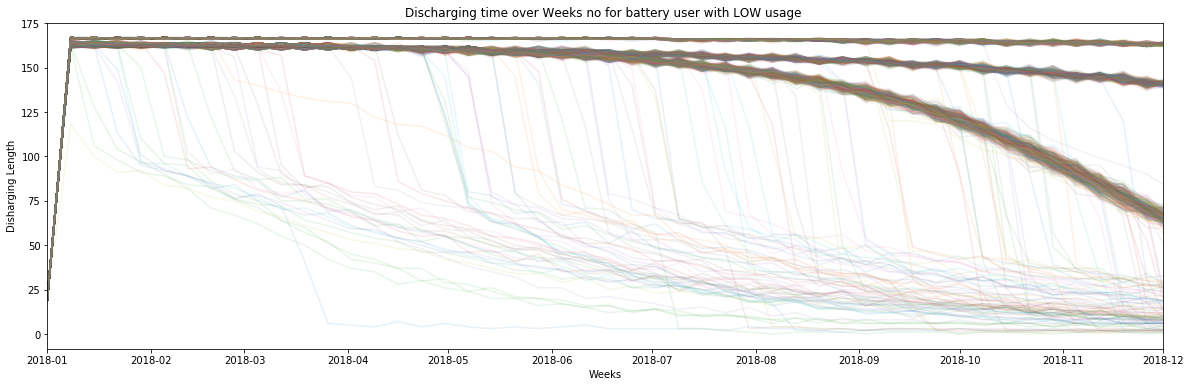

In [42]:
plt.figure(figsize=(20,6))
for u in user_type1['u_id'].unique():
    user_tt = user_type1[ user_type1['u_id'] == u]
    plt.plot(user_tt['Date'], user_tt['Battery_Status_2'],alpha=0.1)
plt.xlabel('Weeks')
plt.ylabel('Disharging Length')
plt.title('Discharging time over Weeks no for battery user with LOW usage ')
plt.xlim('2018-01','2018-12')
plt.show()

### In above plot three different discharging trend of three battery types over a year are visible.
* sudden drops are device failure
* overal view shows the good performance of this battery

## Now lets plot discharging trend of three battery types over a year for user type 2

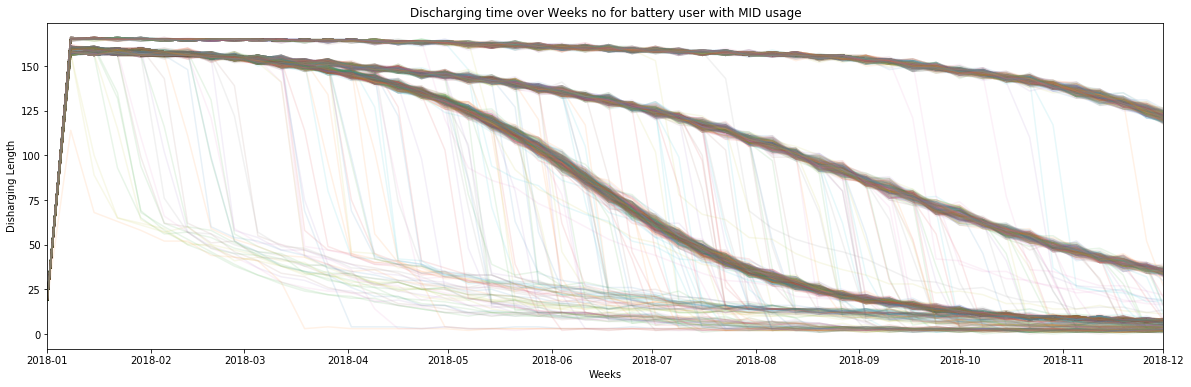

In [44]:
plt.figure(figsize=(20,6))
for u in user_type2['u_id'].unique():
    user_tt = user_type2[ user_type2['u_id'] == u]
    plt.plot(user_tt['Date'], user_tt['Battery_Status_2'],alpha=0.1)
plt.xlabel('Weeks')
plt.ylabel('Disharging Length')
plt.title('Discharging time over Weeks no for battery user with MID usage')
plt.xlim('2018-01','2018-12')
plt.show()

### In above plot three different trend in decrease of discharging  of three battery types over a year are visible.
* decreasing the discharge time shows change the battery health from healthy state to week state.
* sudden drops are device failure
* Overally  as the battery used more the health decreased faster. (Medium quality battery)

## Now lets plot discharging trend of three battery types over a year for user type 3

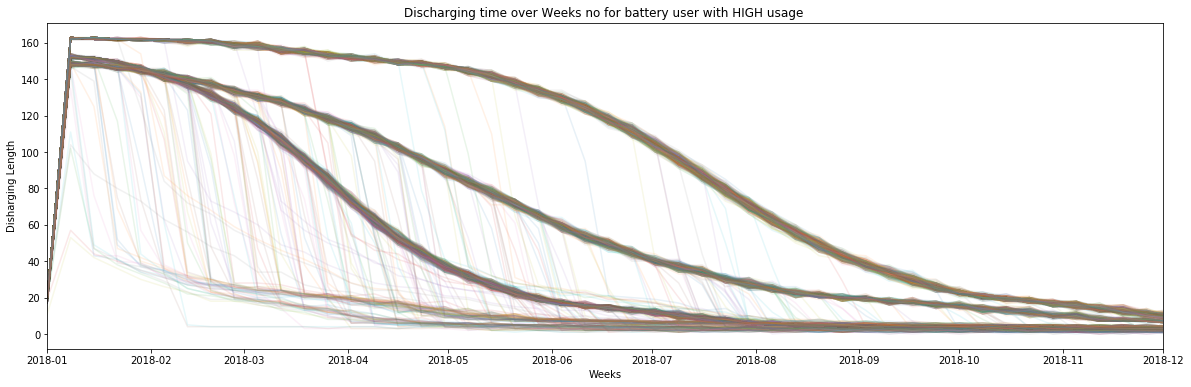

In [47]:
plt.figure(figsize=(20,6))
for u in user_type3['u_id'].unique():
    user_tt = user_type3[ user_type3['u_id'] == u]
    plt.plot(user_tt['Date'], user_tt['Battery_Status_2'],alpha=0.1)
plt.xlabel('Weeks')
plt.ylabel('Disharging Length')
plt.title('Discharging time over Weeks no for battery user with HIGH usage ')
plt.xlim('2018-01','2018-12')
plt.show()

### In above plot three different trend in decrease of discharging  of three battery types over a year are visible.
* decreasing the discharge time shows change the battery health from healthy state to week state.
* sudden drops are device failure
* Overally  as the battery used more the health decreased  Very fast. (Low quality battery)